In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [257]:
path = r"Z:\projects/sequence_squad\organised_data\ppseq_analysis\ppseq_awake_analysis\plots\old_analysis_before_new_data_filtering\\"
region = 'striatum'


yellow = '#E2DC92'
green = '#69BD9D'
blue = '#1C79B5'
red = '#BE575F'
dark_blue = '#264999'
purple = '#724F94'
gold = '#C6963E'

import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.show()
    plt.close()

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def replace_with_order(lst):
    seen = {}
    result = []
    for number in lst:
        if number not in seen:
            seen[number] = len(seen)
        result.append(seen[number])
    return result

def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def relabel_list(lst):
    # Create a dictionary to map original values to new labels
    label_dict = {}
    new_label = 1

    # Iterate over the list and assign new labels
    relabeled_list = []
    for value in lst:
        if value not in label_dict:
            label_dict[value] = new_label
            new_label += 1
        relabeled_list.append(label_dict[value])

    return relabeled_list


def merge_short_blocks(lst,threshold):
    merged_list = []
    current_block = [lst[0]]

    for i in range(1, len(lst)):
        if lst[i] == lst[i-1]:
            current_block.append(lst[i])
        else:
            if len(current_block) < threshold:
                if len(merged_list) > 0:
                    # Join with smallest adjacent block
                    if len(current_block) <= len(merged_list[-1]):
                        merged_list[-1].extend(current_block)
                    else:
                        merged_list.append(current_block + merged_list.pop())
                else:
                    # No adjacent block, discard current block
                    pass
            else:
                merged_list.append(current_block)
            
            current_block = [lst[i]]

    # Check the last block
    if len(current_block) < 3:
        if len(merged_list) > 0:
            if len(current_block) <= len(merged_list[-1]):
                merged_list[-1].extend(current_block)
            else:
                merged_list.append(current_block + merged_list.pop())
        else:
            pass
    else:
        merged_list.append(current_block)
        
    out = []
    for item in merged_list:
        out += [item[0]] * len(item)
        

    return out




136_1_3
136_1_4
148_2_2
149_1_1
149_1_2


C:\Users\Emmett\AppData\Local\Temp\ipykernel_20280\1273540663.py:42: RuntimeWarning: invalid value encountered in divide
  ax.plot(convolve_movmean(smoothed_counts[i]/total_smoothed_counts,100), color = colors[i+1])
C:\Users\Emmett\AppData\Local\Temp\ipykernel_20280\1273540663.py:64: RuntimeWarning: invalid value encountered in divide
  over_thr_mask = (np.array(smoothed_counts[seq])/total_smoothed_counts) > threshold # 20% of the activity is explained by this motif
C:\Users\Emmett\AppData\Local\Temp\ipykernel_20280\1273540663.py:92: RuntimeWarning: invalid value encountered in divide
  v_smoothed_counts += [convolve_movmean(smoothed_counts[i]/total_smoothed_counts,100)]


162_1_3
178_1_4
178_1_5
178_1_6
178_1_7
178_1_8


C:\Users\Emmett\AppData\Local\Temp\ipykernel_20280\1273540663.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


178_1_9
178_2_1
178_2_2
178_2_3
178_2_4
268_1_10
269_1_7
270_1_5


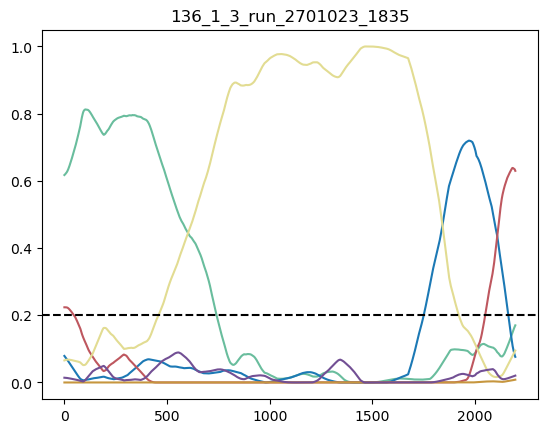

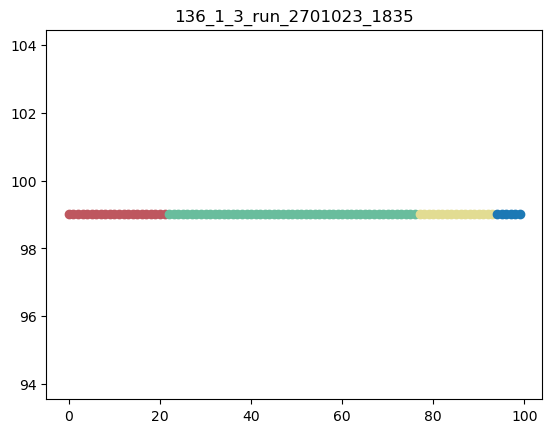

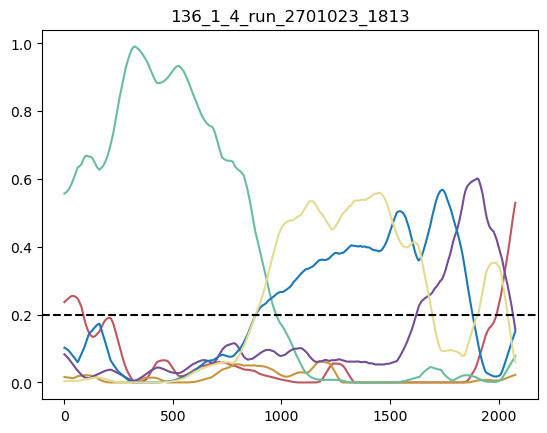

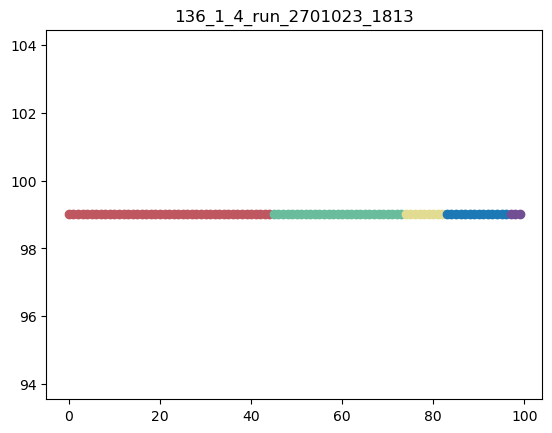

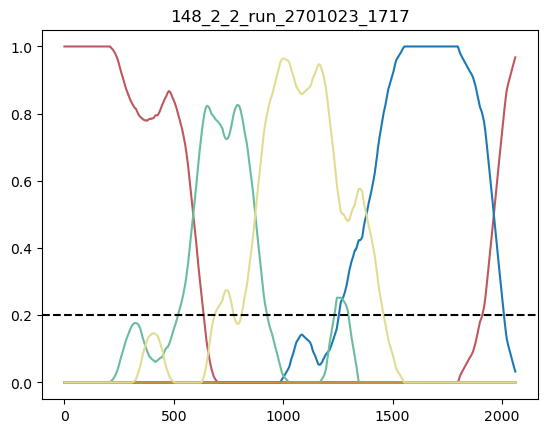

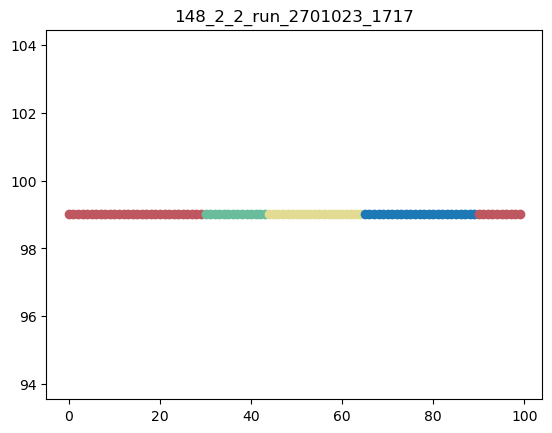

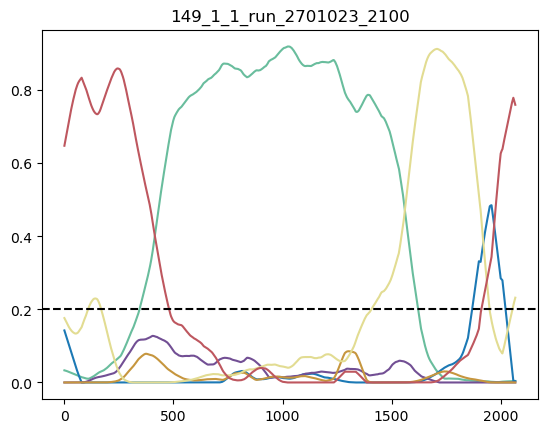

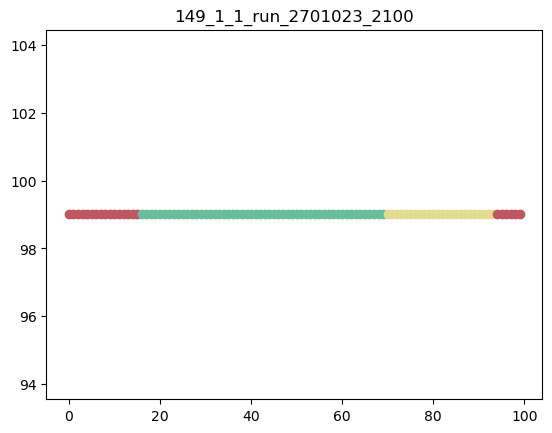

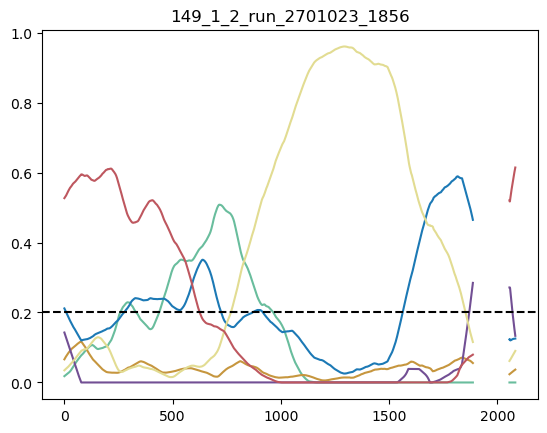

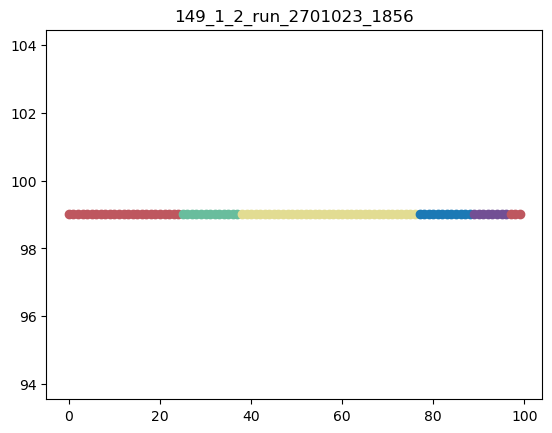

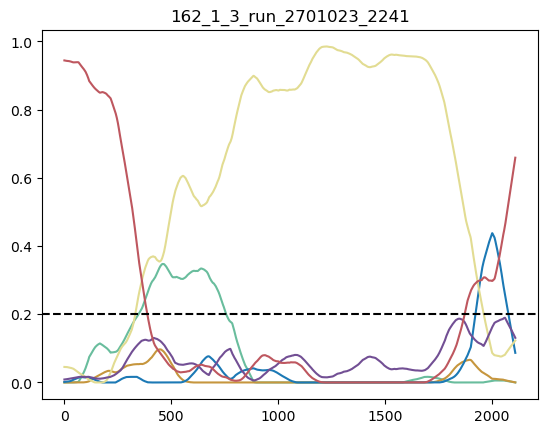

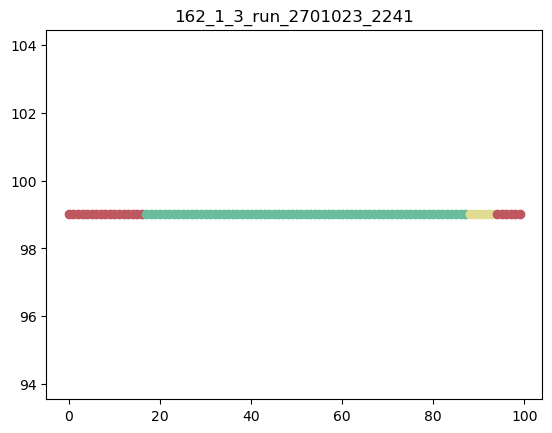

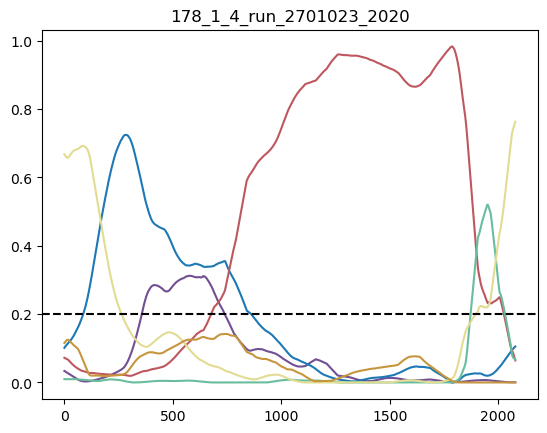

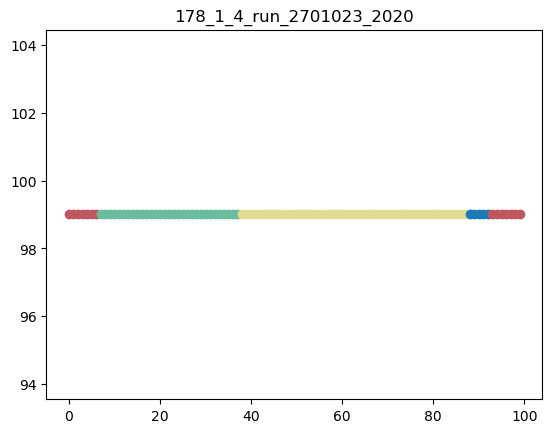

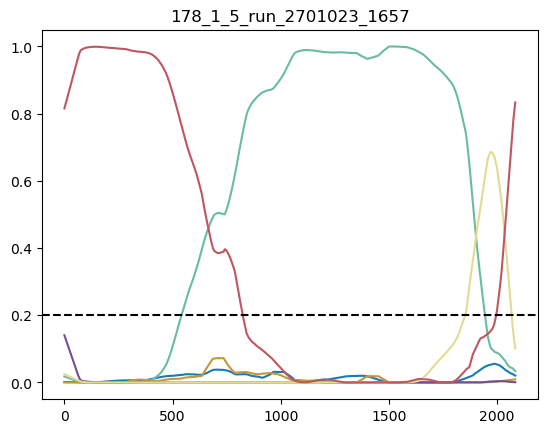

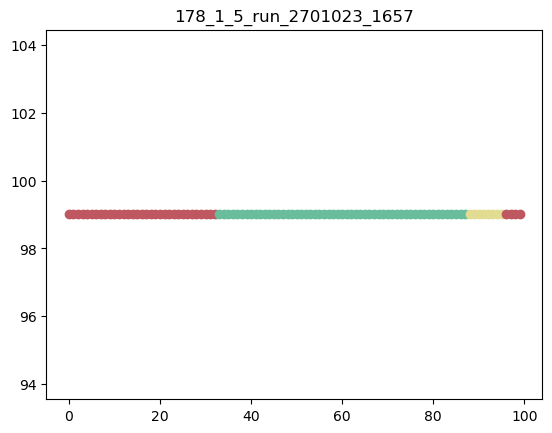

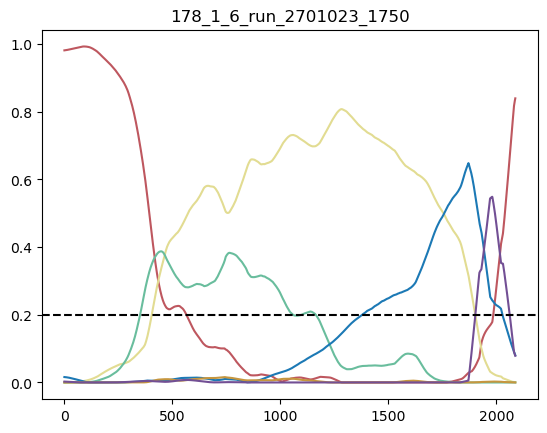

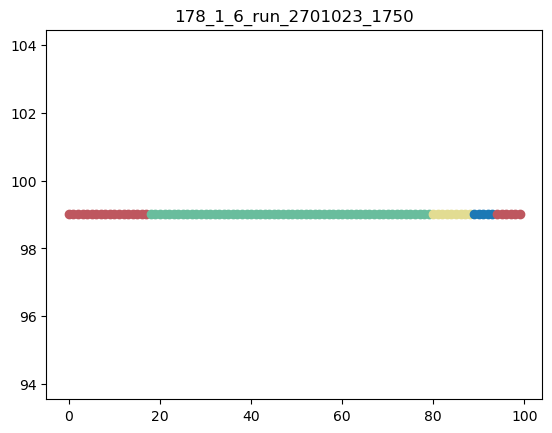

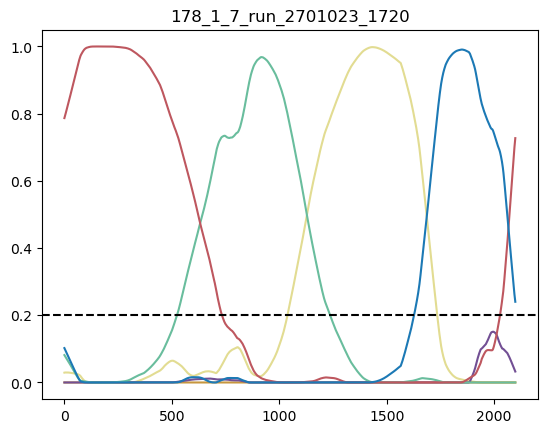

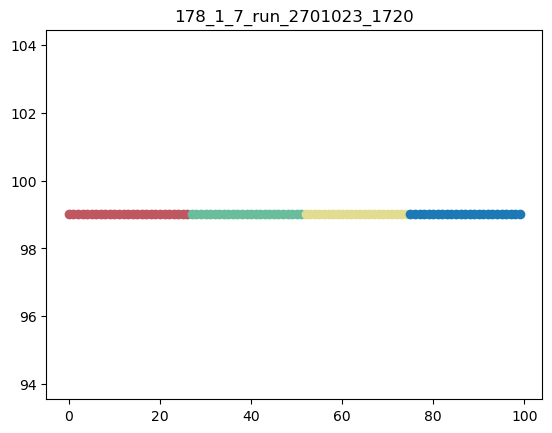

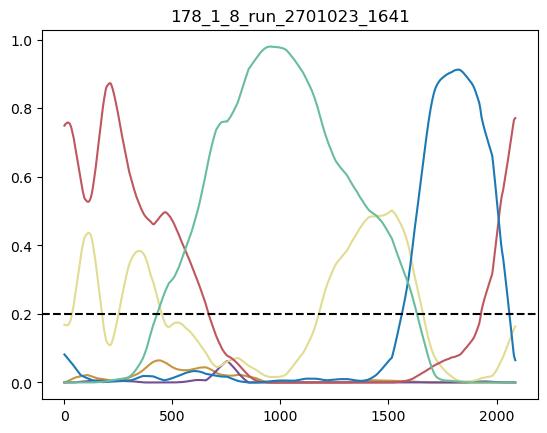

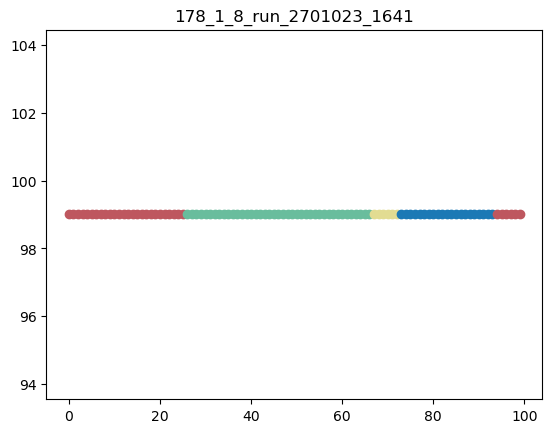

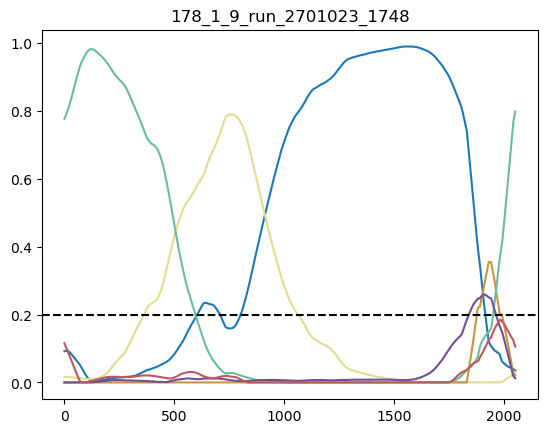

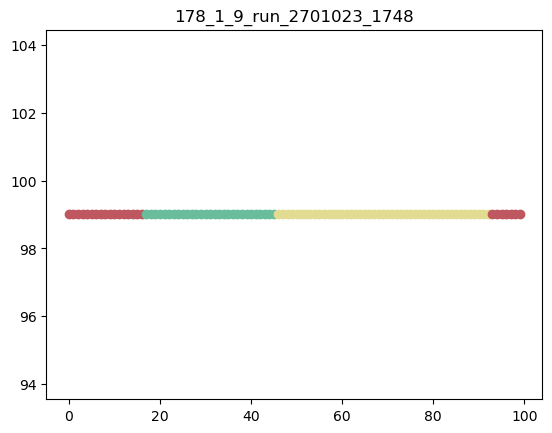

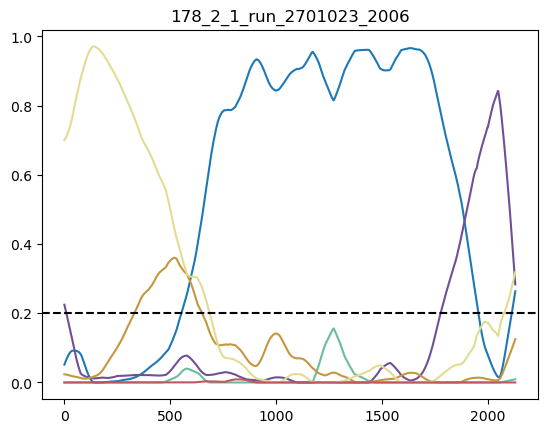

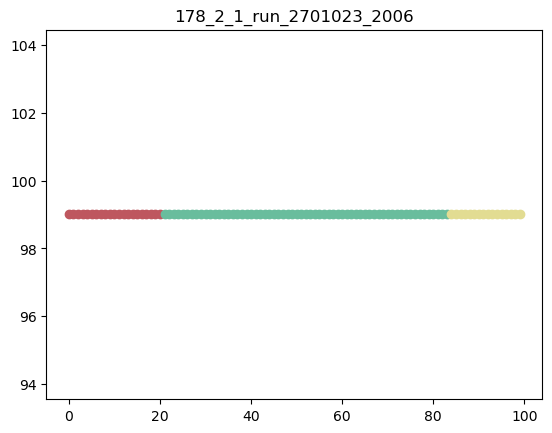

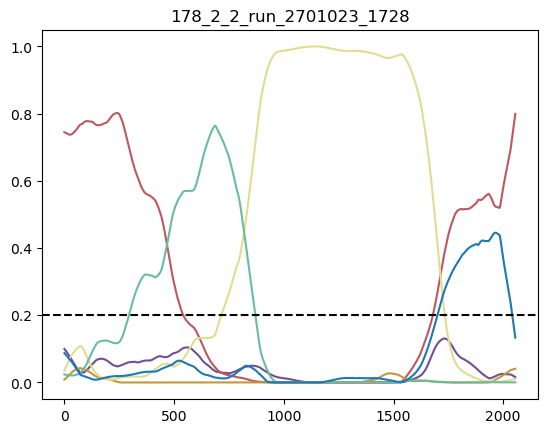

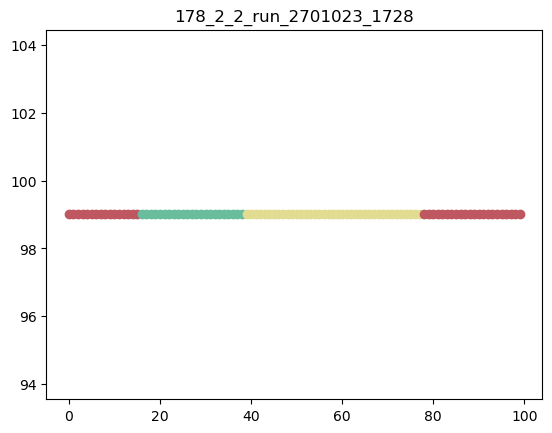

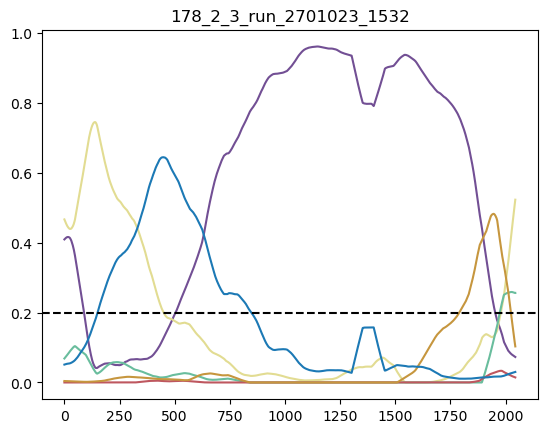

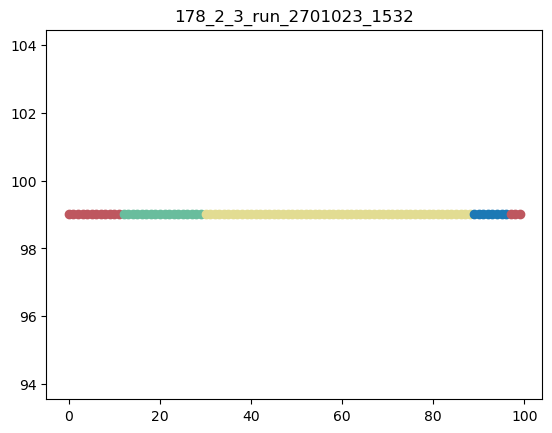

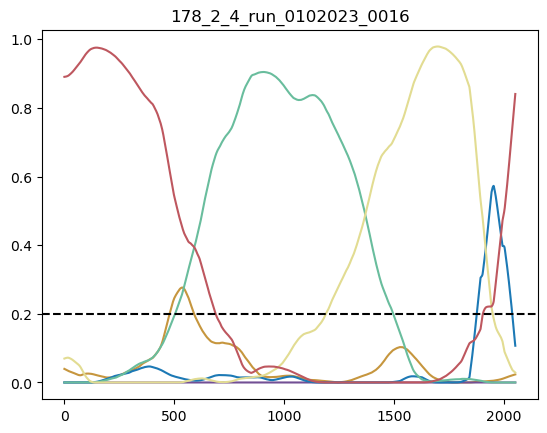

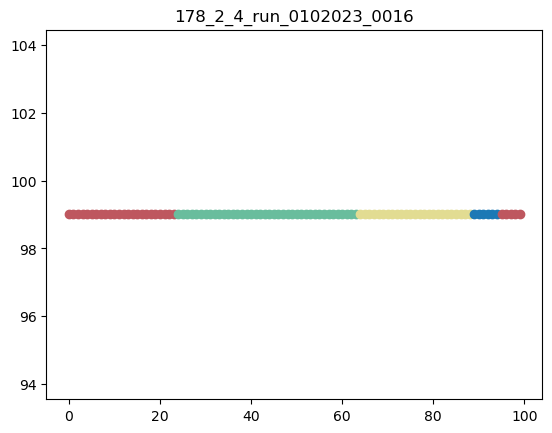

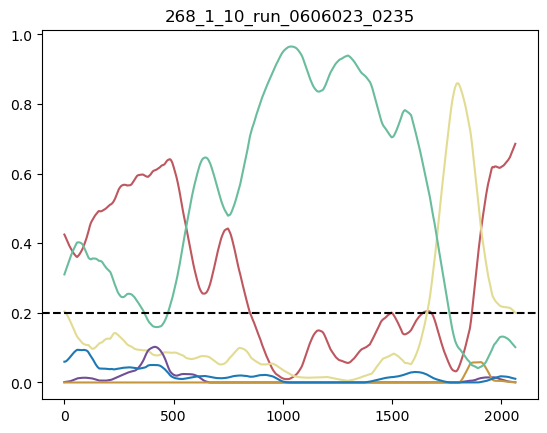

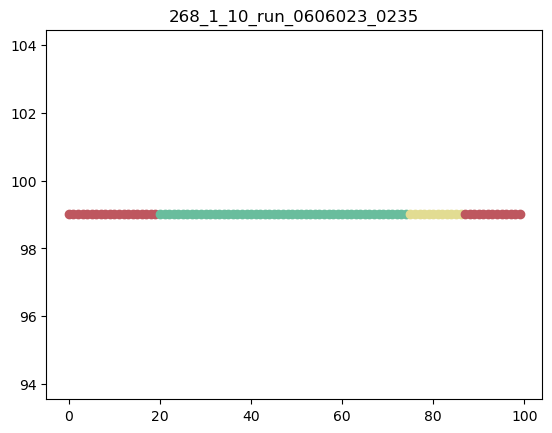

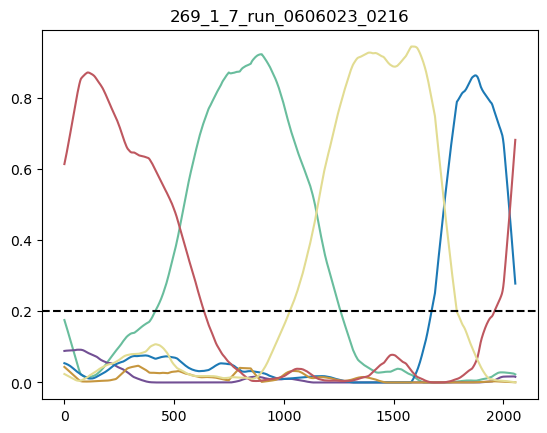

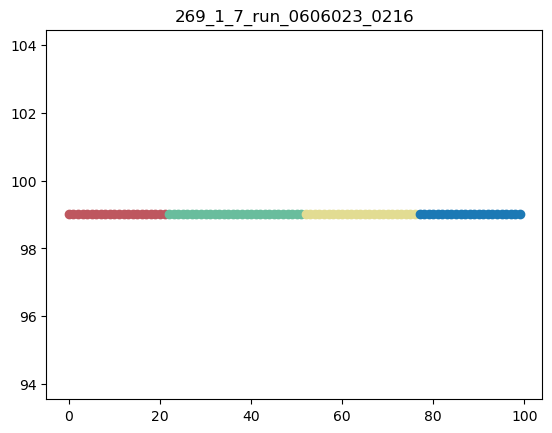

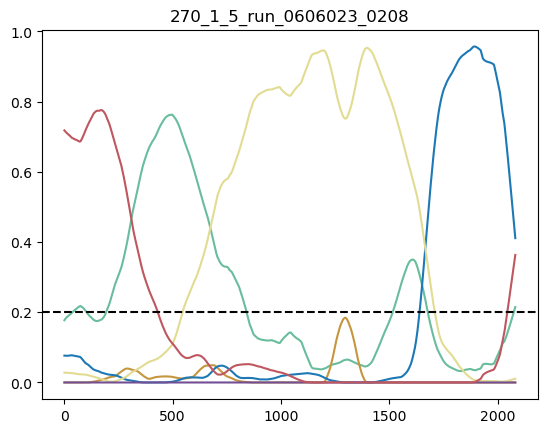

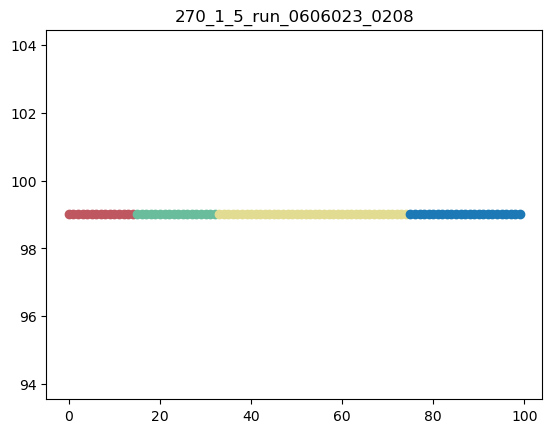

In [560]:
awake_PP_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\awake\\"

color_all= []
relabeled_lists= []
animals = [] 
# ignore those that are during learning:
ignore = ['270_1_1','270_1_3','269_1_1','269_1_2','269_1_3','268_1_2']


list_ = ["148_2_2","136_1_3","136_1_4","149_1_1","149_1_2","162_1_3","178_1_4","178_1_5","178_1_6","178_1_7","178_1_8","178_1_9","178_2_1","178_2_2","178_2_3","178_2_4","268_1_10","269_1_7","270_1_5"]


for index_,M_I_R in enumerate(os.listdir(awake_PP_path)):
    
    if not M_I_R == 'not_suitable':
    
        mouse = '_'.join(M_I_R.split('_')[0:3])

        if mouse in list_:
            print(mouse)

        #     M_I_R = '178_1_7_run_2701023_1720'
            c_path = awake_PP_path + M_I_R + r"\analysis_output\reordered_recolored\\"  
        #     seq_occurances_df = pd.read_csv((c_path+'binned_seq_occurance_df.csv'))

        #     overlap_positions_standard_space = np.load(c_path+ '/overlap_positions_standard_space.npy',allow_pickle = True)

            with open(os.path.join(c_path,"colors"), "rb") as input_file:
                colors = pickle.load(input_file)

            warped_x = np.load(c_path+ 'fixed_standard_space\warped_x.npy',allow_pickle = True)

            smoothed_counts = np.load(c_path+ 'fixed_standard_space\smoothed_counts.npy',allow_pickle = True)


            from itertools import groupby

            total_smoothed_counts = np.array(smoothed_counts).sum(axis=0)

            fig, ax = plt.subplots()
            for i in range(6):
                ax.plot(convolve_movmean(smoothed_counts[i]/total_smoothed_counts,100), color = colors[i+1])   
            ax.set_title(M_I_R)
            
#             if mouse == '178_1_7':
#                 SaveFig('example_dominance_plot.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')
                

            # determine threshold
            threshold = 0.2


            plt.axhline(threshold, color='k', linestyle='--')


            overlap_positions_standard_space = []
            overlap_positions = []

            # overlaps with short bouts   
            overlap_color = []


            for seq in range(6):
                over_thr_mask = (np.array(smoothed_counts[seq])/total_smoothed_counts) > threshold # 20% of the activity is explained by this motif

                # get rid of short isolated motifs
                c = 0
                split_motifs = groupby(over_thr_mask)
                start_over_thr = False
                for over_thr, points in split_motifs:
                    if c==0 and over_thr==True: # keep in mind if a fragment of the motif starts from the beginning of the trial 
                        start_over_thr = True 
                    points = list(points)
                    if over_thr==True: # fragment of motif over threshold (over the threshold)
                        if len(points) < 10 and c+len(points)<len(over_thr_mask): # too short and not at the extremity
                            over_thr_mask[c:c+len(points)] = False # do not count them as a relevant motif
                            change_made = True
                        elif len(points) < 10 and not(start_over_thr): # too short at the right extremity but not at the left extremity
                            over_thr_mask[c:c+len(points)] = False # do not count them as a relevant motif 
                            change_made = True
                    c += len(points)
                overlap_color.append(over_thr_mask)

                overlap_positions += [list(np.linspace(0,len(smoothed_counts[0])-1,len(smoothed_counts[0]))[overlap_color[seq]].astype(int))]

                ###  convert to standard space:
                overlap_positions_standard_space += [list(np.linspace(0,len(smoothed_counts[0])-1,len(smoothed_counts[0]))[overlap_color[seq]] / len(overlap_color[seq]) * 100)]


            v_smoothed_counts= []
            for i in range(len(smoothed_counts)):
                v_smoothed_counts += [convolve_movmean(smoothed_counts[i]/total_smoothed_counts,100)]
            dominant = []
            for bin_ in conactinate_nth_items(v_smoothed_counts):
                dominant += [np.argmax(bin_)+1]


            def most_common(lst):
                return max(set(lst), key=lst.count)

            comprssed_to_hundred_bins = []
            for i in range(100):
                comprssed_to_hundred_bins +=[most_common(list(np.array(dominant)[(warped_x >= i) * (warped_x <= i+1)]))]
            color_ = np.array(colors)[comprssed_to_hundred_bins]
            

            new_color_order_for_nice_plotting = ['spacer','#BE575F','#69BD9D','#E2DC92','#1C79B5', '#724F94','#C6963E']

            # covert colors back into numbers :
            seq_type = []
            for i in range(len(color_)):
                index = colors.index(color_[i])
                seq_type += [index]
                
            # hacky fix for weird error:
            if mouse == '149_1_2':
                seq_type= [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6]
            if mouse == '268_1_10':
                seq_type = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
            
            # remove very short blocks ()
            result = merge_short_blocks(seq_type,5)

            relabeled_list = relabel_list(result)

            new_nice_plotting_color_order = np.array(new_color_order_for_nice_plotting)[relabeled_list]



            fig, ax = plt.subplots()
            for index,point in enumerate(new_nice_plotting_color_order):
                ax.plot(index,i,'o',color = point)
            ax.set_title(M_I_R)
            
#             if mouse == '178_1_7':
#                 SaveFig('example_dominance_plot_lines.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')
                
            
#             color_all += [color_]
            relabeled_lists += [relabeled_list]
            color_all += [new_nice_plotting_color_order]
            animals += [mouse]
                
#             break



In [259]:
### clean this up some more to get rid of small ones 
## work out what to do with extra seqs (reward etc.)
## save all of this information out so that it can be used to make sense replay down the line

[Text(0, 0, '136_1_3'),
 Text(0, 1, '136_1_4'),
 Text(0, 2, '148_2_2'),
 Text(0, 3, '149_1_1'),
 Text(0, 4, '149_1_2'),
 Text(0, 5, '162_1_3'),
 Text(0, 6, '178_1_4'),
 Text(0, 7, '178_1_5'),
 Text(0, 8, '178_1_6'),
 Text(0, 9, '178_1_7'),
 Text(0, 10, '178_1_8'),
 Text(0, 11, '178_1_9'),
 Text(0, 12, '178_2_1'),
 Text(0, 13, '178_2_2'),
 Text(0, 14, '178_2_3'),
 Text(0, 15, '178_2_4'),
 Text(0, 16, '268_1_10'),
 Text(0, 17, '269_1_7'),
 Text(0, 18, '270_1_5')]

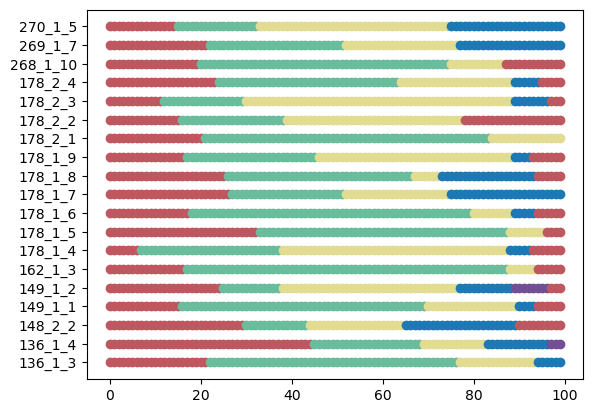

In [558]:
fig, ax = plt.subplots()
for i,line in enumerate(color_all):
    for index,point in enumerate(line):
        ax.plot(index,i,'o',color = point)
        
ax.set_yticks(range(0,len(animals)))
ax.set_yticklabels(animals)
    

In [639]:
three_list = []
five_list = []
four_list = []
six_list = []


for index, animal in enumerate(animals):
    num = len(np.unique(color_all[index]))
    if animal in ['149_1_2','162_1_3','174_1_4','178_1_6','178_1_5','178_1_7','178_2_2','178_2_3']:
        num = num + 1
    if animal == '178_1_9':
        num = num + 3
    
    
    if num == 3:
        three_list += [animal]
        
    elif num == 4:
        four_list += [animal]
        
    elif num ==5:
        five_list += [animal]       
    elif num ==6:
        six_list += [animal] 
    else:
        print('WHAT!' + num)



three_indices = [index for index, item in enumerate(animals) if item in three_list]
four_indices = [index for index, item in enumerate(animals) if item in four_list]
five_indices = [index for index, item in enumerate(animals) if item in five_list]
six_indices = [index for index, item in enumerate(animals) if item in six_list]

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.show()
    plt.close()

In [619]:
def hamming_distance(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length.")

    distance = sum(el1 != el2 for el1, el2 in zip(list1, list2))
    return distance

def sort_lists_by_similarity(lists):
    sorted_indices = sorted(range(len(lists)), key=lambda x: sum(hamming_distance(lists[x], y) for y in lists))
    sorted_lists = [lists[i] for i in sorted_indices]
    return sorted_lists, sorted_indices



[Text(0, 0, '178_2_1'), Text(0, 1, '149_1_1'), Text(0, 2, '268_1_10')]

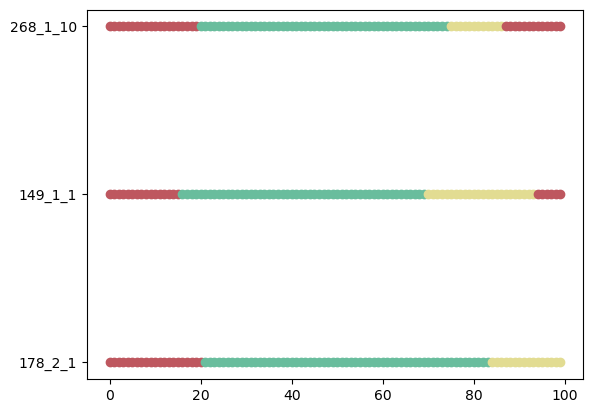

In [651]:
current_ = np.array(relabeled_lists)[three_indices]
current_ = [l.tolist() for l in current_]

sorted_lists, new_indices = sort_lists_by_similarity(current_)

# sorted_list = sorted(enumerate(current_), key=lambda x: x[1].count(1))
# new_indices = [index for index, _ in sorted_list]
new_indices.reverse()

three_data = (np.array(color_all)[three_indices])[new_indices]
list_data = np.array(three_list)[new_indices]


fig, ax = plt.subplots()
for i,line in enumerate(three_data):
    for index,point in enumerate(line):
        ax.plot(index,i,'o',color = point)
        
ax.set_yticks(range(0,len(three_data)))
ax.set_yticklabels(list_data)



[Text(0, 0, '178_1_4'),
 Text(0, 1, '178_1_5'),
 Text(0, 2, '270_1_5'),
 Text(0, 3, '148_2_2'),
 Text(0, 4, '178_2_2'),
 Text(0, 5, '162_1_3'),
 Text(0, 6, '136_1_3'),
 Text(0, 7, '178_1_8'),
 Text(0, 8, '269_1_7'),
 Text(0, 9, '178_2_4')]

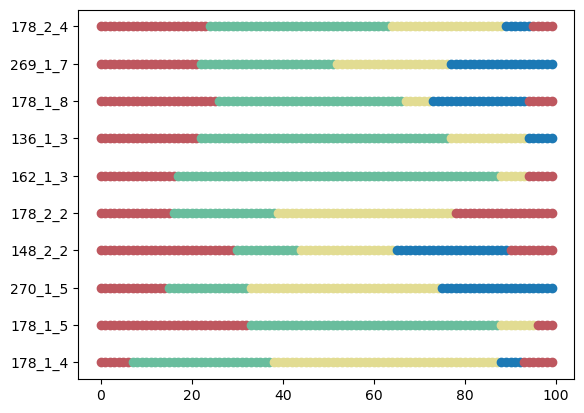

In [650]:
current_ = np.array(relabeled_lists)[four_indices]
current_ = [l.tolist() for l in current_]

sorted_lists, new_indices = sort_lists_by_similarity(current_)

# sorted_list = sorted(enumerate(current_), key=lambda x: x[1].count(1))
# new_indices = [index for index, _ in sorted_list]
new_indices.reverse()

four_data = (np.array(color_all)[four_indices])[new_indices]
list_data = np.array(four_list)[new_indices]


fig, ax = plt.subplots()
for i,line in enumerate(four_data):
    for index,point in enumerate(line):
        ax.plot(index,i,'o',color = point)
        
ax.set_yticks(range(0,len(four_data)))
ax.set_yticklabels(list_data)

[Text(0, 0, '178_2_3'),
 Text(0, 1, '136_1_4'),
 Text(0, 2, '178_1_7'),
 Text(0, 3, '178_1_6')]

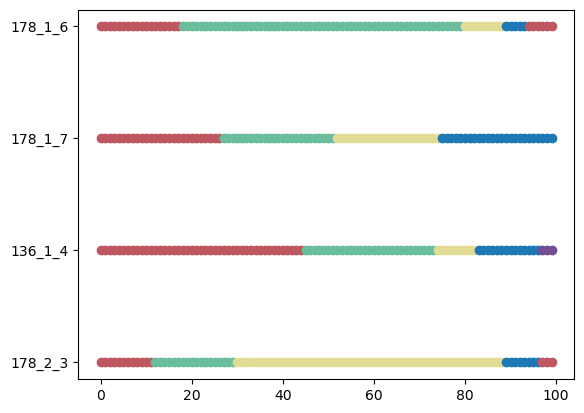

In [649]:
current_ = np.array(relabeled_lists)[five_indices]
current_ = [l.tolist() for l in current_]

sorted_lists, new_indices = sort_lists_by_similarity(current_)

# sorted_list = sorted(enumerate(current_), key=lambda x: x[1].count(1))
# new_indices = [index for index, _ in sorted_list]
new_indices.reverse()

five_data = (np.array(color_all)[five_indices])[new_indices]
list_data = np.array(five_list)[new_indices]

fig, ax = plt.subplots()
for i,line in enumerate(five_data):
    for index,point in enumerate(line):
        ax.plot(index,i,'o',color = point)
        
ax.set_yticks(range(0,len(five_data)))
ax.set_yticklabels(list_data)

[Text(0, 0, '178_1_9'), Text(0, 1, '149_1_2')]

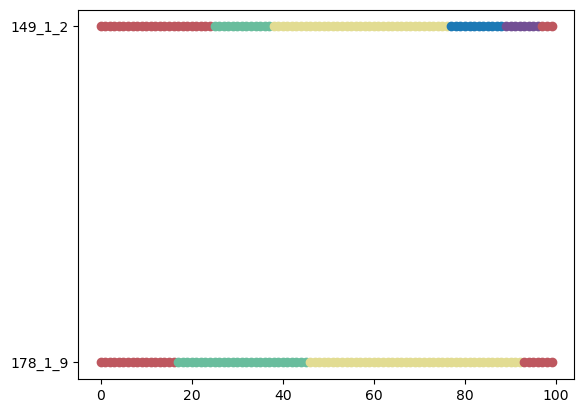

In [648]:
current_ = np.array(relabeled_lists)[six_indices]
current_ = [l.tolist() for l in current_]

sorted_lists, new_indices = sort_lists_by_similarity(current_)

# sorted_list = sorted(enumerate(current_), key=lambda x: x[1].count(1))
# new_indices = [index for index, _ in sorted_list]
new_indices.reverse()

six_data = (np.array(color_all)[six_indices])[new_indices]
list_data = np.array(six_list)[new_indices]

fig, ax = plt.subplots()
for i,line in enumerate(six_data):
    for index,point in enumerate(line):
        ax.plot(index,i,'o',color = point)
        
ax.set_yticks(range(0,len(six_data)))
ax.set_yticklabels(list_data)

In [644]:
six_indices

[4, 11]

In [647]:
new_indices

[1, 0]

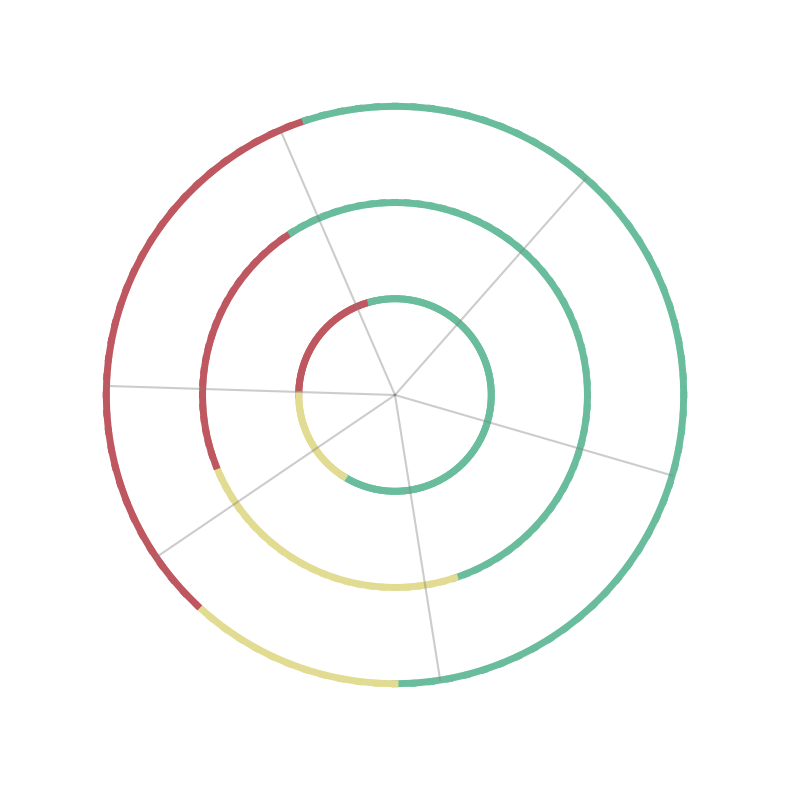

In [628]:
import numpy as np
import matplotlib.pyplot as plt

x_positions = [0, 18, 36, 54, 72, 90]

five_color_all = three_data
num_rings = len(five_color_all)  # Number of rings
num_segments = 100  # Number of segments in each ring

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot rings
for i in range(num_rings):
    radius = i + 1  # Radius of the ring
    theta = np.linspace(0, 2 * np.pi, num_segments)
    segment_length = 2 * np.pi / num_segments
    
    # Add line markers for port positions
    if i == num_rings - 1:
        mark = True
    else:
        mark = False
    
    # Calculate the exact start and end points of each line segment
    for j in range(num_segments):
        start_angle = j * segment_length
        end_angle = (j + 1) * segment_length
        
        # Calculate start and end points of the line segment
        x_start = radius * np.cos(start_angle)
        y_start = radius * np.sin(start_angle)
        x_end = radius * np.cos(end_angle)
        y_end = radius * np.sin(end_angle)
        
        # Plot line segment for each ring
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color=five_color_all[i][j],
            linewidth=5
        )

        # Add lines through the specified positions on each ring
        if mark and j in x_positions:
            # Calculate the bisecting point
            bisect_x = (x_start + x_end) / 2
            bisect_y = (y_start + y_end) / 2
            
            # Plot line from center to bisecting point
            ax.plot(
                [0, bisect_x],
                [0, bisect_y],'-',
                color='grey',alpha = 0.4
            )

# Set plot limits and remove axes
ax.set_xlim(-(num_rings + 1), num_rings + 1)
ax.set_ylim(-(num_rings + 1), num_rings + 1)
ax.axis('off')

# Invert x-axis
ax.invert_xaxis()

SaveFig('three.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')

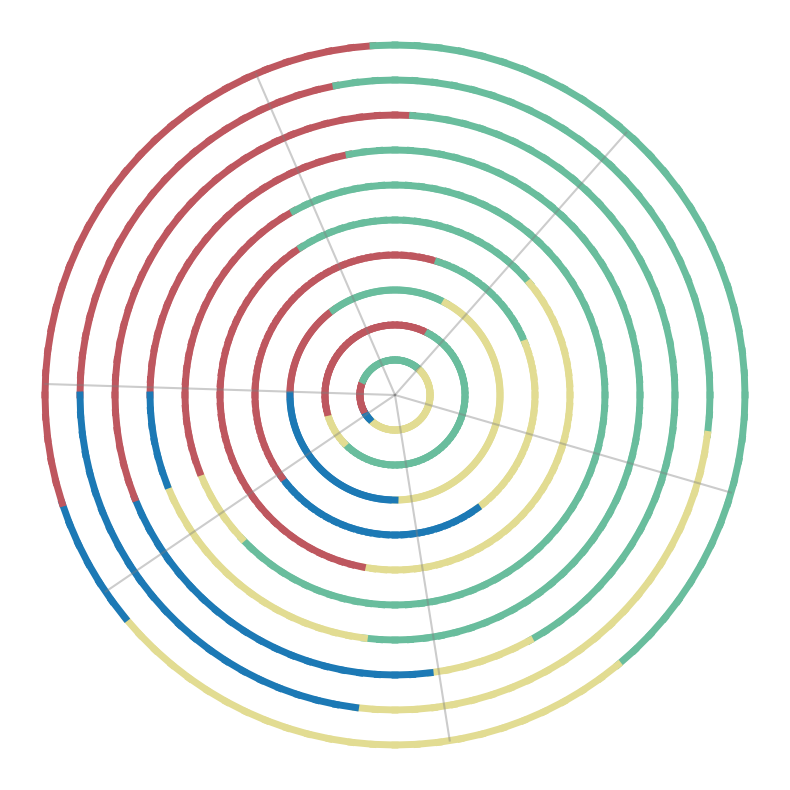

In [629]:
import numpy as np
import matplotlib.pyplot as plt

x_positions = [0, 18, 36, 54, 72, 90]

five_color_all = four_data
num_rings = len(five_color_all)  # Number of rings
num_segments = 100  # Number of segments in each ring

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot rings
for i in range(num_rings):
    radius = i + 1  # Radius of the ring
    theta = np.linspace(0, 2 * np.pi, num_segments)
    segment_length = 2 * np.pi / num_segments
    
    # Add line markers for port positions
    if i == num_rings - 1:
        mark = True
    else:
        mark = False
    
    # Calculate the exact start and end points of each line segment
    for j in range(num_segments):
        start_angle = j * segment_length
        end_angle = (j + 1) * segment_length
        
        # Calculate start and end points of the line segment
        x_start = radius * np.cos(start_angle)
        y_start = radius * np.sin(start_angle)
        x_end = radius * np.cos(end_angle)
        y_end = radius * np.sin(end_angle)
        
        # Plot line segment for each ring
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color=five_color_all[i][j],
            linewidth=5
        )

        # Add lines through the specified positions on each ring
        if mark and j in x_positions:
            # Calculate the bisecting point
            bisect_x = (x_start + x_end) / 2
            bisect_y = (y_start + y_end) / 2
            
            # Plot line from center to bisecting point
            ax.plot(
                [0, bisect_x],
                [0, bisect_y],'-',
                color='grey',alpha = 0.4
            )

# Set plot limits and remove axes
ax.set_xlim(-(num_rings + 1), num_rings + 1)
ax.set_ylim(-(num_rings + 1), num_rings + 1)
ax.axis('off')

# Invert x-axis
ax.invert_xaxis()

SaveFig('four.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')

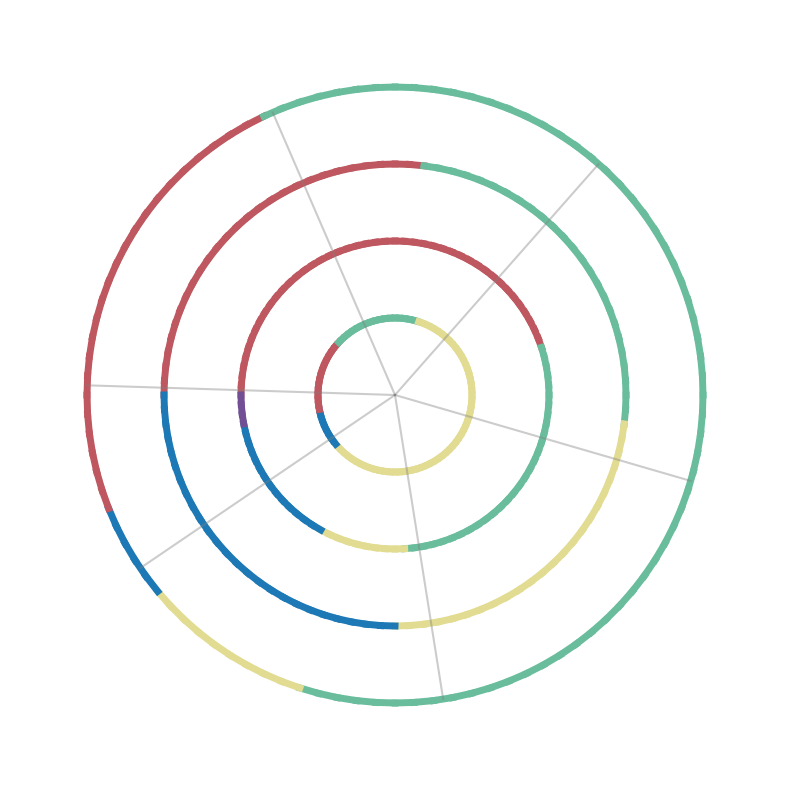

In [630]:
import numpy as np
import matplotlib.pyplot as plt

x_positions = [0, 18, 36, 54, 72, 90]

five_color_all = five_data
num_rings = len(five_color_all)  # Number of rings
num_segments = 100  # Number of segments in each ring

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot rings
for i in range(num_rings):
    radius = i + 1  # Radius of the ring
    theta = np.linspace(0, 2 * np.pi, num_segments)
    segment_length = 2 * np.pi / num_segments
    
    # Add line markers for port positions
    if i == num_rings - 1:
        mark = True
    else:
        mark = False
    
    # Calculate the exact start and end points of each line segment
    for j in range(num_segments):
        start_angle = j * segment_length
        end_angle = (j + 1) * segment_length
        
        # Calculate start and end points of the line segment
        x_start = radius * np.cos(start_angle)
        y_start = radius * np.sin(start_angle)
        x_end = radius * np.cos(end_angle)
        y_end = radius * np.sin(end_angle)
        
        # Plot line segment for each ring
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color=five_color_all[i][j],
            linewidth=5
        )

        # Add lines through the specified positions on each ring
        if mark and j in x_positions:
            # Calculate the bisecting point
            bisect_x = (x_start + x_end) / 2
            bisect_y = (y_start + y_end) / 2
            
            # Plot line from center to bisecting point
            ax.plot(
                [0, bisect_x],
                [0, bisect_y],'-',
                color='grey',alpha = 0.4
            )

# Set plot limits and remove axes
ax.set_xlim(-(num_rings + 1), num_rings + 1)
ax.set_ylim(-(num_rings + 1), num_rings + 1)
ax.axis('off')

# Invert x-axis
ax.invert_xaxis()

SaveFig('five.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')

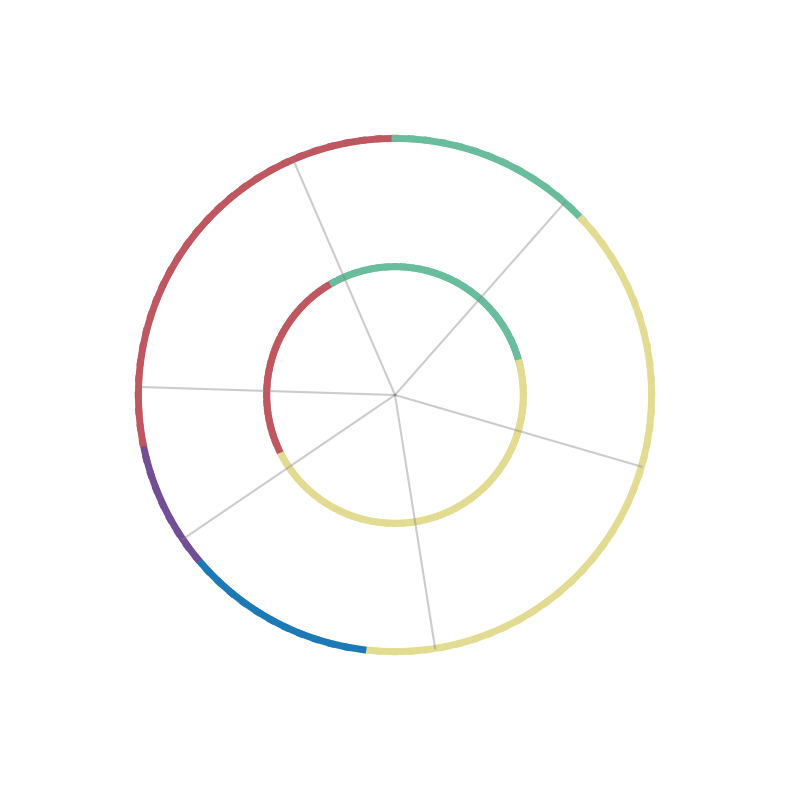

In [631]:
import numpy as np
import matplotlib.pyplot as plt

x_positions = [0, 18, 36, 54, 72, 90]

five_color_all = six_data
num_rings = len(five_color_all)  # Number of rings
num_segments = 100  # Number of segments in each ring

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot rings
for i in range(num_rings):
    radius = i + 1  # Radius of the ring
    theta = np.linspace(0, 2 * np.pi, num_segments)
    segment_length = 2 * np.pi / num_segments
    
    # Add line markers for port positions
    if i == num_rings - 1:
        mark = True
    else:
        mark = False
    
    # Calculate the exact start and end points of each line segment
    for j in range(num_segments):
        start_angle = j * segment_length
        end_angle = (j + 1) * segment_length
        
        # Calculate start and end points of the line segment
        x_start = radius * np.cos(start_angle)
        y_start = radius * np.sin(start_angle)
        x_end = radius * np.cos(end_angle)
        y_end = radius * np.sin(end_angle)
        
        # Plot line segment for each ring
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color=five_color_all[i][j],
            linewidth=5
        )

        # Add lines through the specified positions on each ring
        if mark and j in x_positions:
            # Calculate the bisecting point
            bisect_x = (x_start + x_end) / 2
            bisect_y = (y_start + y_end) / 2
            
            # Plot line from center to bisecting point
            ax.plot(
                [0, bisect_x],
                [0, bisect_y],'-',
                color='grey',alpha = 0.4
            )

# Set plot limits and remove axes
ax.set_xlim(-(num_rings + 1), num_rings + 1)
ax.set_ylim(-(num_rings + 1), num_rings + 1)
ax.axis('off')

# Invert x-axis
ax.invert_xaxis()

SaveFig('six.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')

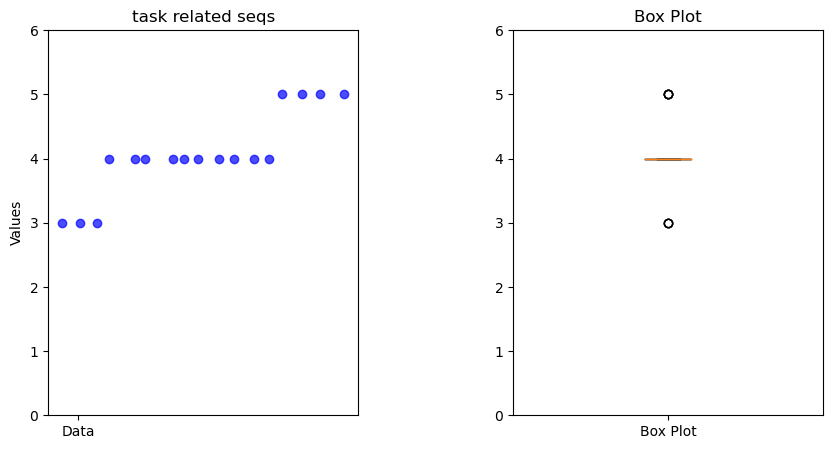

In [632]:
import matplotlib.pyplot as plt
import numpy as np

data = len(three_data) * [3] + len(four_data) * [4] + len(five_data)*[5]

# Set the fixed spacing between points
spacing = 0.2

# Generate x-coordinates for the jittered points
x = np.random.normal(0, spacing, len(data)) + np.arange(len(data))


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the raw data with jittering
ax1.scatter(x, data, color='blue', alpha=0.7)
ax1.set_xticks([1])
ax1.set_xticklabels(['Data'])
ax1.set_ylabel('Values')
ax1.set_title('task related seqs')
ax1.set_ylim(0,6)

# Plot the box plot
ax2.boxplot(data, vert=True)
ax2.set_xticklabels(['Box Plot'])
ax2.set_title('Box Plot')
ax2.set_ylim(0,6)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()


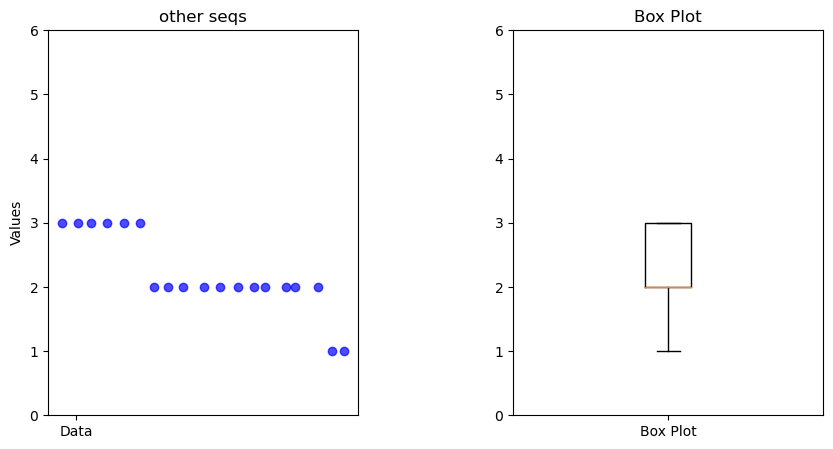

In [528]:
import matplotlib.pyplot as plt
import numpy as np

data = len(three_data) * [3] + len(four_data) * [4] + len(five_data)*[5]
data= 6 - np.array(data)

# Set the fixed spacing between points
spacing = 0.2

# Generate x-coordinates for the jittered points
x = np.random.normal(0, spacing, len(data)) + np.arange(len(data))

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the raw data with jittering
ax1.scatter(x, data, color='blue', alpha=0.7)
ax1.set_xticks([1])
ax1.set_xticklabels(['Data'])
ax1.set_ylabel('Values')
ax1.set_title('other seqs')
ax1.set_ylim(0,6)

# Plot the box plot
ax2.boxplot(data, vert=True)
ax2.set_xticklabels(['Box Plot'])
ax2.set_title('Box Plot')
ax2.set_ylim(0,6)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()


In [532]:
grooming = 18
other =  13
task_reward = 7
task_other = 4

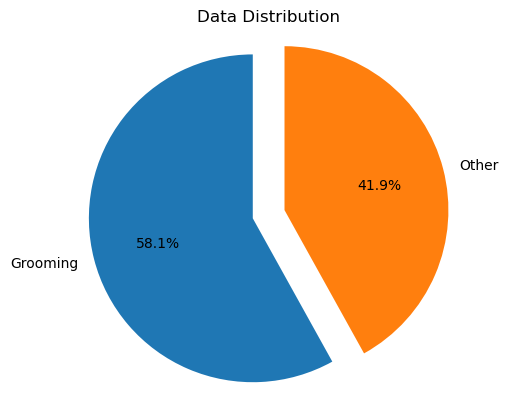

In [658]:
import matplotlib.pyplot as plt

grooming = 18
other = 13
# task_reward = 7
# task_other = 4

# Data labels
labels = ['Grooming', 'Other']

# Data values
sizes = [grooming, other]

# Explode the slice with the highest value (Grooming)
explode = [0.2, 0]

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

# Aspect ratio ensures pie is drawn as a circle
plt.axis('equal')

# Set plot title
plt.title('Data Distribution')



SaveFig('others.pdf',r'Z:\projects\Emmett\Documents\writeup\fig4_PPseq\\')

In [497]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [490]:
len(three_data)

6

In [401]:
calculate_midpoint((radius * np.cos(start_angle),radius * np.sin(start_angle)),(radius * np.cos(end_angle),radius * np.sin(end_angle)))

(19.980267284282718, -0.6279051952931262)

In [388]:
[), radius * np.cos(end_angle)]

[19.960534568565432, 20.0]

In [390]:
[radius * np.sin(start_angle), radius * np.sin(end_angle)]

[-1.2558103905862652, 1.2864981197413092e-14]

(19.980267284282718, -0.6279051952931262)

In [398]:
(radius * np.cos(start_angle),radius * np.sin(start_angle))

(19.960534568565432, -1.2558103905862652)

In [404]:
def calculate_midpoint(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    midpoint_x = (x1 + x2) / 2
    midpoint_y = (y1 + y2) / 2
    return (midpoint_x, midpoint_y)

# # Calculate midpoint
# midpoint = calculate_midpoint(point1, point2)
# print(f"Midpoint: {midpoint}")


In [375]:
current_color[(i+j) % len(current_color)]

'#BE575F'

'#BE575F'

ValueError: Unrecognized marker style '-'

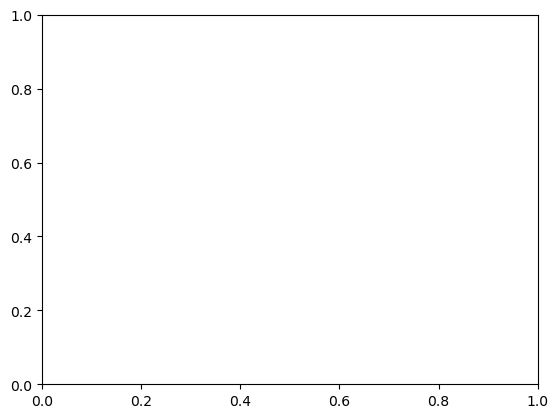

In [328]:
plt.scatter(x, y, color=color_, marker = '-')

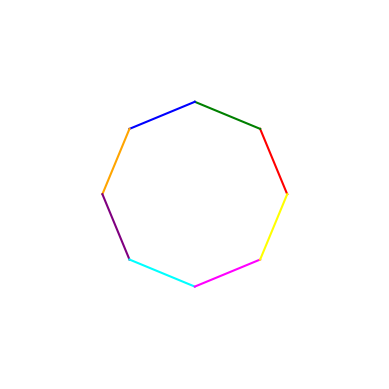

In [329]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
num_segments = 8  # Number of segments in the line
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Create figure and axes
fig, ax = plt.subplots()

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot line segments
theta = np.linspace(0, 2 * np.pi, num_segments + 1)[:-1]  # Angles for segments
radius = 1  # Radius of the line
segment_length = 2 * np.pi / num_segments  # Length of each segment

for i in range(num_segments):
    start_angle = i * segment_length
    end_angle = (i + 1) * segment_length
    ax.plot([np.cos(start_angle), np.cos(end_angle)],
            [np.sin(start_angle), np.sin(end_angle)],
            color=colors[i])

# Set plot limits and remove axes
ax.set_xlim(-radius - 1, radius + 1)
ax.set_ylim(-radius - 1, radius + 1)
ax.axis('off')

# Show the plot
plt.show()


In [192]:
len(total_smoothed_counts)

2099

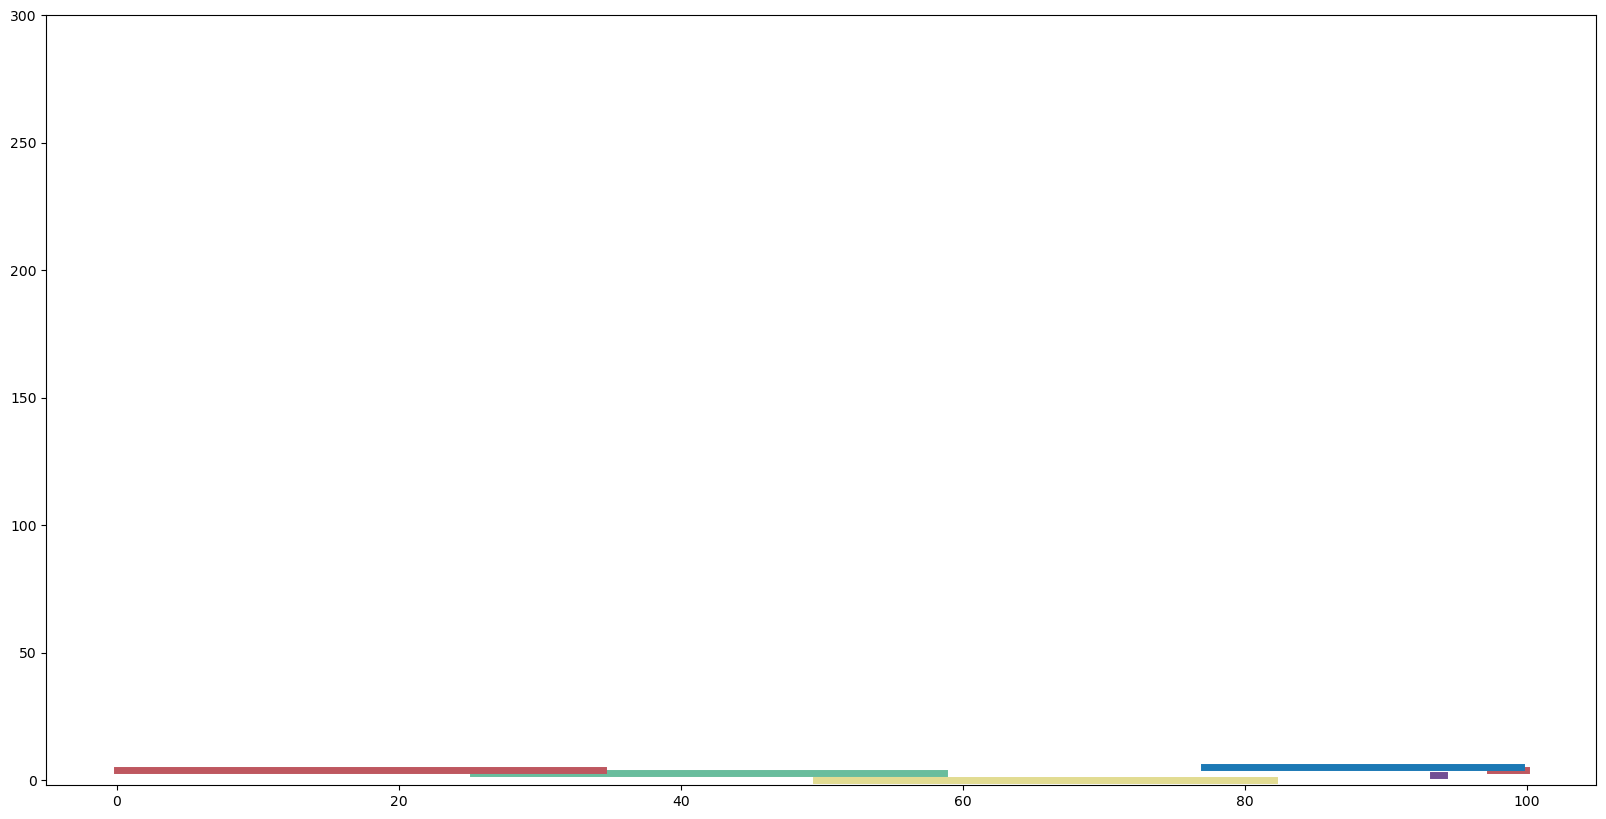

In [180]:
fig,ax = plt.subplots(1, 1,figsize=(20, 10))



#### loop over them, check if they are different sections.



for index,chunks in enumerate(overlap_positions_standard_space):
    
    if len(chunks) > 0:

        # Calculate index differences
        index_diff = np.diff(chunks)

        # Identify indices where index gap exceeds the threshold
        split_indices = [i+1 for i, diff in enumerate(index_diff) if diff > 5]

        if len(split_indices) > 0:
            # Split the time series based on the identified indices
            split_list = []
            start_idx = 0
            for split_idx in split_indices:
                split_list.append(chunks[start_idx:split_idx])
                start_idx = split_idx
            # Append the remaining part as the last time series
            split_list.append(chunks[start_idx:])
            for chunk in split_list:
                ax.plot([min(chunk),max(chunk)],[index,index],'-',linewidth =5,color = colors[index+1] )
        else:
            split_list = chunks
            ax.plot([min(split_list),max(split_list)],[index,index],'-',linewidth =5,color = colors[index+1])
            
    ax.set_ylim(-2,300)
    

In [178]:
warped_x*100

array([0.00000000e+00, 3.68098160e+00, 7.36196319e+00, ...,
       9.98113208e+03, 9.99056604e+03, 1.00000000e+04])

In [140]:
split_list

[]

In [136]:
len(split_indices)

0

In [114]:
chunks = overlap_positions_standard_space[4]

In [126]:
 Make a nice looking plot that can add others to it.
## also extract information about seqs - how many etc. 



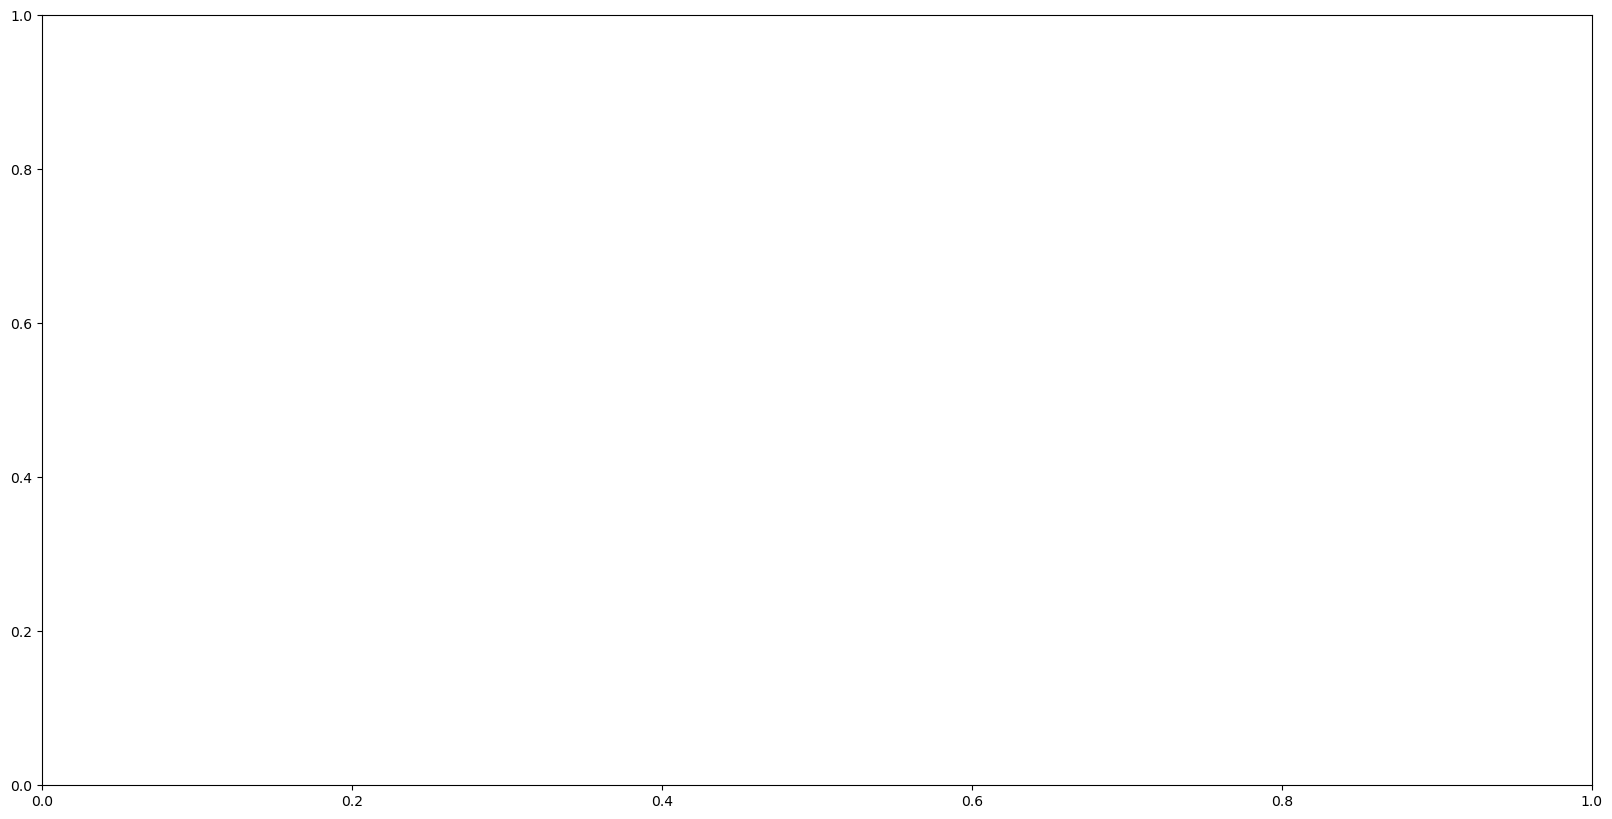

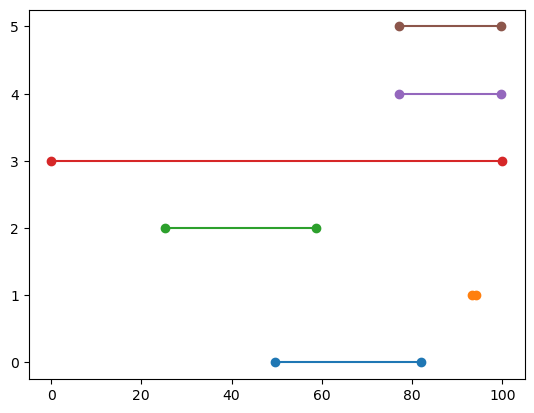

In [94]:




plt.plot([min(overlap_positions_standard_space[2]),max(overlap_positions_standard_space[2])],[1,1],'o-')
plt.plot([min(overlap_positions_standard_space[3]),max(overlap_positions_standard_space[3])],[2,2],'o-')
plt.plot([min(overlap_positions_standard_space[4]),max(overlap_positions_standard_space[4])],[3,3],'o-')
plt.plot([min(overlap_positions_standard_space[5]),max(overlap_positions_standard_space[5])],[4,4],'o-')
plt.plot([min(overlap_positions_standard_space[5]),max(overlap_positions_standard_space[5])],[5,5],'o-')

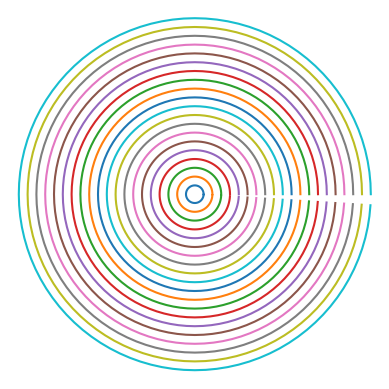

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
num_lines = 20  # Number of lines
num_segments = 100  # Number of segments in each line
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Create figure and axes
fig, ax = plt.subplots()

# Set aspect ratio to equal to make the plot circular
ax.set_aspect('equal')

# Plot lines
theta = np.linspace(0, 2 * np.pi, num_segments + 1)[:-1]  # Angles for segments
for i in range(num_lines):
    radius = i + 1  # Radius of line
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(x, y)

# Set plot limits and remove axes
ax.set_xlim(-num_lines - 1, num_lines + 1)
ax.set_ylim(-num_lines - 1, num_lines + 1)
ax.axis('off')

# Show the plot
plt.show()


In [77]:
[min(overlap_positions_standard_space[0]),max(overlap_positions_standard_space[0])]

[49.59504525964745, 82.0867079561696]

In [26]:
animals = ['178_1_7','178_2_1','162_1_3','149_1_2','136_1_2']



dominant_all = []
warped_x_all = []
mouse_id = []

for i,dir_ in enumerate(os.listdir(path)):
    if dir_ in animals:
        c_path = os.path.join(os.path.join(path,dir_),region) + r'\\'
        if os.path.isdir(c_path):
            seq_occurances_df = pd.read_csv((c_path+'binned_seq_occurance_df.csv'))

            with open (c_path + 'warped_x' , 'rb') as fp:
                warped_x = pickle.load(fp)    

            smoothed_counts = []
            for header in list(seq_occurances_df)[1::]:
                count = seq_occurances_df[header].values
                smoothed_counts += [convolve_movmean(count,100)]

            dominant = []
            for item in conactinate_nth_items(smoothed_counts[:]):
                dominant += [np.argmax(item)+1]

            dominant_all += [replace_with_order(dominant)]
            warped_x_all += [warped_x]
            mouse_id += [dir_]


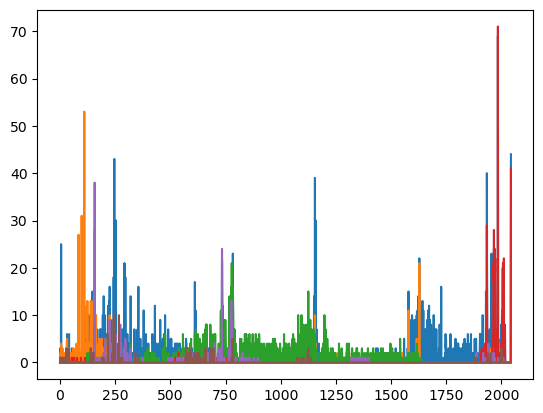

In [58]:
plt.plot(seq_occurances_df.seq_0_counts)
plt.plot(seq_occurances_df.seq_1_counts)
plt.plot(seq_occurances_df.seq_2_counts)
plt.plot(seq_occurances_df.seq_3_counts)
plt.plot(seq_occurances_df.seq_4_counts)
plt.plot(seq_occurances_df.seq_5_counts)

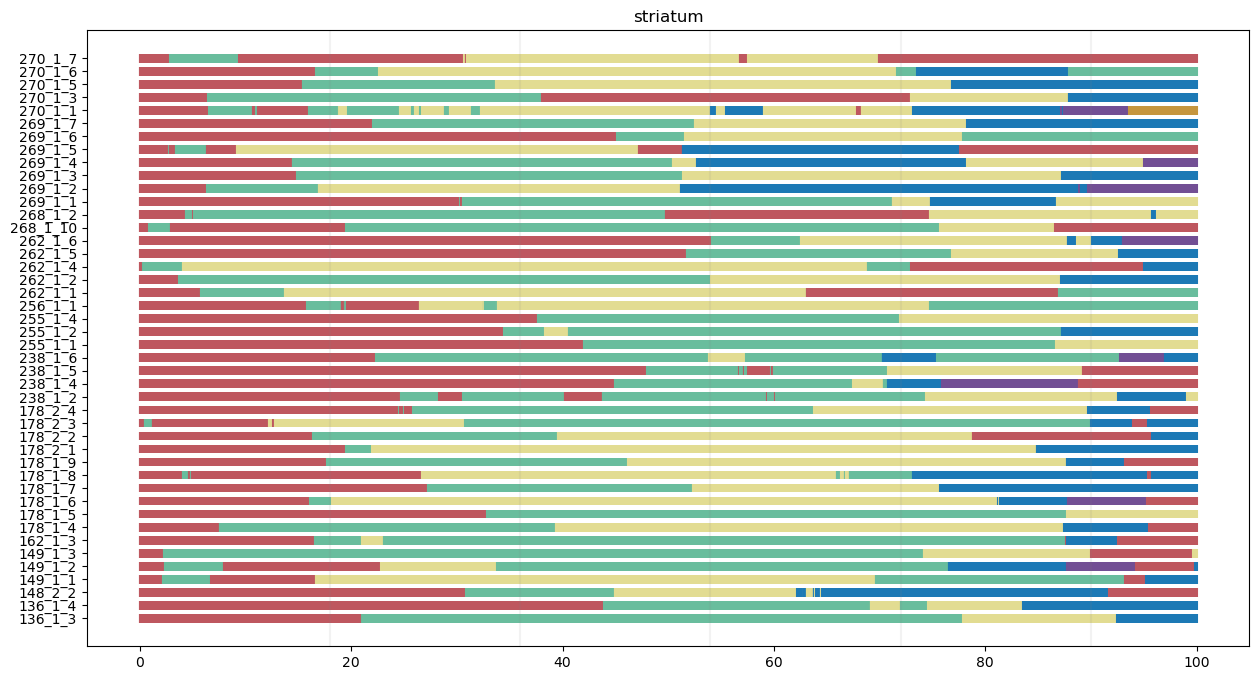

In [49]:
x_positions = [0,18, 36, 54, 72, 90,100]
new_colors = colors = [red,green,yellow,blue,purple,gold,dark_blue]
labels= []
nrow = 1
ncol = 1
fig, axs = plt.subplots(nrow, ncol,figsize=(15, 8))
for ind, ax in enumerate(fig.axes):    
    
    labels = labels + []
    
    for item in x_positions[1:-1]:
        ax.axvline(item,color = 'grey', alpha = 0.1)
    
    for i in range(len(mouse_id)):
        c_ = np.array(new_colors)[dominant_all[i]]
        ax.scatter(warped_x_all[i], [i]*len(warped_x_all[i]),marker = '|', s=40, color = c_)


ax.set_yticks(range(0,len(mouse_id)))
ax.set_yticklabels(mouse_id)
ax.set_title(region)


# SaveFig('standard_space_multianimal.png','D:\\')